In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv("data/tracts_to_nearest_bench.csv")
df

,GISJOIN,GEOID,STATEFP,COUNTYFP,TRACTCE,POPULATION,LATITUDE,LONGITUDE,geometry,closest_bench,...,Latitude,Longitude,NTAName,SeatingTyp,date,lat_long,distance_km,distance_m,travel_time,travel_time_sec
0,G3600050000100,36005000100,36,5,100,3772,40.791709,-73.884503,POINT (1834172.3055000007 583266.1962000001),"(40.8098290466, -73.8802074781)",...,40.809829,-73.880207,Hunts Point,BACKED,2017-06-29,"(40.8098290466, -73.8802074781)",NaN,NaN,NaN,0.0
1,G3600050000200,36005000200,36,5,200,4779,40.811740,-73.859760,POINT (1835669.2375000007 585926.6995000001),"(40.8135012283, -73.8580258069)",...,40.813501,-73.858026,Soundview-Clason Point,BACKLESS,2014-12-18,"(40.8135012283, -73.8580258069)",0.4 km,376.0,5 mins,NaN
2,G3600050000400,36005000400,36,5,400,6272,40.809831,-73.853290,POINT (1836245.2989999987 585843.6816000007),"(40.8135012283, -73.8580258069)",...,40.813501,-73.858026,Soundview-Clason Point,BACKLESS,2014-12-18,"(40.8135012283, -73.8580258069)",0.7 km,724.0,9 mins,NaN
3,G3600050001600,36005001600,36,5,1600,5795,40.819555,-73.859196,POINT (1835513.0854000002 586789.1511000004),"(40.8204551606, -73.8580429709)",...,40.820455,-73.858043,Soundview-Clason Point,BACKED,2013-08-08,"(40.8204551606, -73.8580429709)",0.2 km,186.0,2 mins,NaN
4,G3600050001901,36005001901,36,5,1901,2292,40.806572,-73.927684,POINT (1830272.601399999 584053.4228000008),"(40.8060822771, -73.9259454483)",...,40.806082,-73.925945,Mott Haven-Port Morris,BACKED,2016-06-10,"(40.8060822771, -73.9259454483)",0.2 km,189.0,2 mins,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,G3600850030302,36085030302,36,85,30302,6669,40.623555,-74.161381,POINT (1815907.2617000006 559617.2177000009),"(40.6266900646, -74.1619032256)",...,40.626690,-74.161903,Mariner's Harbor-Arlington-Graniteville,BACKLESS,2017-06-08,"(40.6266900646, -74.1619032256)",0.5 km,484.0,6 mins,NaN
2401,G3600850031901,36085031901,36,85,31901,3262,40.631387,-74.163047,POINT (1815571.376699999 560439.5537999999),"(40.626958394, -74.164303149)",...,40.626958,-74.164303,Mariner's Harbor-Arlington-Graniteville,BACKLESS,2017-06-07,"(40.626958394, -74.164303149)",0.7 km,745.0,9 mins,NaN
2402,G3600850031902,36085031902,36,85,31902,5500,40.637768,-74.166825,POINT (1815100.0551000014 561063.3067000005),"(40.6274662085, -74.1677678754)",...,40.627466,-74.167768,Mariner's Harbor-Arlington-Graniteville,BACKED,2013-05-01,"(40.6274662085, -74.1677678754)",1.4 km,1359.0,17 mins,NaN
2403,G3600850032300,36085032300,36,85,32300,1233,40.634014,-74.173096,POINT (1814683.640999999 560534.1253999993),"(40.6274662085, -74.1677678754)",...,40.627466,-74.167768,Mariner's Harbor-Arlington-Graniteville,BACKED,2013-05-01,"(40.6274662085, -74.1677678754)",1.5 km,1511.0,19 mins,NaN


In [3]:
df.dtypes

GISJOIN             object
GEOID                int64
STATEFP              int64
COUNTYFP             int64
TRACTCE              int64
POPULATION           int64
LATITUDE           float64
LONGITUDE          float64
geometry            object
closest_bench       object
the_geom            object
ObjectID             int64
BoroName            object
Latitude           float64
Longitude          float64
NTAName             object
SeatingTyp          object
date                object
lat_long            object
distance_km         object
distance_m         float64
travel_time         object
travel_time_sec    float64
dtype: object

In [4]:
df.travel_time.value_counts()

3 mins             318
4 mins             298
5 mins             284
2 mins             241
6 mins             191
7 mins             178
1 min              176
8 mins             123
9 mins             117
11 mins             96
10 mins             86
12 mins             46
14 mins             27
13 mins             27
16 mins             26
17 mins             24
19 mins             20
15 mins             19
18 mins             15
21 mins             11
20 mins              6
25 mins              5
26 mins              5
22 mins              5
23 mins              5
28 mins              5
33 mins              4
34 mins              3
29 mins              3
30 mins              3
36 mins              3
24 mins              3
37 mins              2
39 mins              2
1 hour 16 mins       2
1 hour 17 mins       1
52 mins              1
3 hours 32 mins      1
1 hour 9 mins        1
1 hour 14 mins       1
1 hour 42 mins       1
3 hours 13 mins      1
45 mins              1
6 hours 25 

# a function to convert travel time to seconds

In [5]:
def time_converter(row):
    time = str(row['travel_time'])
    if "hour" in time:
        pattern = r"^(\d+) hours? (\d+) mins?"
        parsed = re.findall(pattern, time)
        hour = int(parsed[0][0])
        row['travel_time_min']= int(parsed[0][1]) + 60*hour
    elif "min" in time:
        pattern = r"^(\d+) mins?"
        parsed = re.findall(pattern, time)
        row['travel_time_min']= int(parsed[0])
    else:
        print("not found")
    return row

In [6]:
df = df.apply(time_converter,axis=1)

not found
not found
not found
not found
not found
not found
not found
not found


In [7]:
df.sample(10)

,BoroName,COUNTYFP,GEOID,GISJOIN,LATITUDE,LONGITUDE,Latitude,Longitude,NTAName,ObjectID,...,closest_bench,date,distance_km,distance_m,geometry,lat_long,the_geom,travel_time,travel_time_min,travel_time_sec
1015,Brooklyn,47,36047080800,G3600470080800,40.657667,-73.941479,40.655660,-73.944214,East Flatbush-Erasmus,382,...,"(40.6556595715, -73.9442140062)",2015-10-01,0.5 km,512.0,POINT (1832985.5989000015 567558.1428999994),"(40.6556595715, -73.9442140062)",POINT (-73.94421400621397 40.65565957150111),7 mins,7.0,NaN
110,Bronx,5,36005017100,G3600050017100,40.840386,-73.907480,40.839955,-73.910319,Mount Eden-Claremont (West),1695,...,"(40.8399545294, -73.9103190858)",2013-09-09,0.4 km,368.0,POINT (1831045.2566 588127.6581999995),"(40.8399545294, -73.9103190858)",POINT (-73.91031908582772 40.83995452937807),4 mins,4.0,NaN
164,Bronx,5,36005022800,G3600050022800,40.854256,-73.863667,40.853808,-73.867605,Pelham Parkway-Van Nest,1764,...,"(40.8538075985, -73.8676049505)",2015-01-21,0.4 km,418.0,POINT (1834252.1226000004 590483.9613000005),"(40.8538075985, -73.8676049505)",POINT (-73.86760495047767 40.853807598503565),5 mins,5.0,NaN
493,Brooklyn,47,36047014700,G3600470014700,40.659555,-73.989956,40.660063,-73.987717,Sunset Park (West),401,...,"(40.6600627566, -73.987717142)",2013-05-09,0.3 km,309.0,POINT (1828981.1583000012 566829.9504000004),"(40.6600627566, -73.987717142)",POINT (-73.98771714196934 40.66006275663505),4 mins,4.0,NaN
1145,Brooklyn,47,36047116400,G3600470116400,40.670591,-73.881416,40.672687,-73.884872,East New York (North),537,...,"(40.6726873863, -73.8848720441)",2014-10-08,0.5 km,495.0,POINT (1837552.4288000017 570126.6678999998),"(40.6726873863, -73.8848720441)",POINT (-73.88487204407014 40.67268738628518),6 mins,6.0,NaN
2393,Staten Island,85,36085027706,G3600850027706,40.590494,-74.161749,40.610214,-74.162485,New Springville-Willowbrook-Bulls Head-Travis,134,...,"(40.6102138501, -74.1624854932)",2014-08-11,2.7 km,2710.0,POINT (1816720.6818999983 556004.4672999997),"(40.6102138501, -74.1624854932)",POINT (-74.16248549323512 40.610213850098354),34 mins,34.0,NaN
259,Bronx,5,36005035100,G3600050035100,40.893911,-73.899229,40.895857,-73.892293,Van Cortlandt Park,1878,...,"(40.8958567042, -73.892292577)",2017-03-11,1.8 km,1787.0,POINT (1830335.303199999 594119.3377),"(40.8958567042, -73.892292577)",POINT (-73.89229257704223 40.89585670424556),21 mins,21.0,NaN
1125,Brooklyn,47,36047111600,G3600470111600,40.664358,-73.876959,40.665482,-73.878930,East New York-New Lots,456,...,"(40.6654823375, -73.8789302513)",2016-06-13,0.6 km,642.0,POINT (1838077.0430999994 569533.5775000006),"(40.6654823375, -73.8789302513)",POINT (-73.87893025127298 40.66548233749766),8 mins,8.0,NaN
123,Bronx,5,36005018502,G3600050018502,40.826863,-73.905728,40.824981,-73.906099,Morrisania,1613,...,"(40.8249813944, -73.9060991598)",2014-09-12,0.3 km,327.0,POINT (1831536.7628000006 586687.7389000002),"(40.8249813944, -73.9060991598)",POINT (-73.90609915983663 40.82498139436653),4 mins,4.0,NaN
2371,Staten Island,85,36085020803,G3600850020803,40.533899,-74.210697,40.528525,-74.192448,Annadale-Huguenot-Prince's Bay-Woodrow,2241,...,"(40.5285252615, -74.1924477247)",2012-12-21,2.3 km,2331.0,POINT (1814161.1557999998 548896.4453999996),"(40.5285252615, -74.1924477247)",POINT (-74.19244772474683 40.52852526153197),29 mins,29.0,NaN


# Get Elderly Data
source: https://data2go.nyc/map/?id=212*36005040400*sixtyfive_tract!undefined!ns*!other_pop_cd_506~ahdi_puma_1~sch_enrol_cd_112~age_pyramid_male_85_plus_cd_20~median_household_income_puma_397~median_personal_earnings_puma_400~dis_y_perc_puma_102~poverty_ceo_cd_417~unemployment_cd_408~pre_k_cd_107!*air_qual_cd~ahdi_puma*family_homeless_cd_245#10/40.8278/-73.9586

In [8]:
# get elderly data
elderly = pd.read_excel(open('data/Data2Go.NYC.5th.Edition.Demographics.xlsx', 'rb'),
              sheet_name='Tract', skiprows=9)
pd.set_option('display.max_columns', None)
elderly.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,VARIABLE,adult_samehome_tract,asian_api_pop_tract,asian_api_total_tract,asian_api_pop_tract_historical,aframer_pop_tract,black_pop_tract,aframer_total_pop_tract,black_pop_tract_historical,child_samehome_tract,disabled_tract,divorced_tract,lonelyaged_tract,sixtyfive_tract,familynochild_tract,female_veterans_tract,female_veterans_percent_tract,age_pyramid_female_under_5_tract,age_pyramid_female_5_to_14_tract,age_pyramid_female_15_to_24_tract,age_pyramid_female_25_to_34_tract,age_pyramid_female_35_to_44_tract,age_pyramid_female_45_to_54_tract,age_pyramid_female_55_to_64_tract,age_pyramid_female_65_to_74_tract,age_pyramid_female_75_to_84_tract,age_pyramid_female_85_plus_tract,foreign_tract,nec_afr_tract,nec_asia_tract,aus_nz_ocean_tract,carib_amer_tract,cent_amer_tract,east_afr_tract,east_asia_tract,east_eur_tract,nec_eur_tract,fiji_ocean_tract,mid_afr_tract,north_amer_tract,north_afr_tract,north_eur_tract,nec_ocean_tract,south_amer_tract,south_cen_asia_tract,south_east_asia_tract,south_afr_tract,south_eur_tract,west_afr_tract,west_asia_tract,west_eur_tract,grandrearers_tract,familychild_tract,latino_pop_tract,latino_total_pop_tract,latino_pop_tract_historical,lonely_tract,male_veterans_tract,male_veterans_percent_tract,age_pyramid_male_under_5_tract,age_pyramid_male_5_to_14_tract,age_pyramid_male_15_to_24_tract,age_pyramid_male_25_to_34_tract,age_pyramid_male_35_to_44_tract,age_pyramid_male_45_to_54_tract,age_pyramid_male_55_to_64_tract,age_pyramid_male_65_to_74_tract,age_pyramid_male_75_to_84_tract,age_pyramid_male_85_plus_tract,married_tract,marriedchild_tract,natamer_pop_tract,natamer_total_pop_tract,native_amer_pop_tract_historical,nonfammore1_tract,nonfamilychild_tract,total_population_tract,underfive_tract,total_population_tract_historical,prime_age_tract,singledad_tract,singlemom_tract,api_speaker_tract,badenglish_speakers_tract,nonenglish_speakers_tract,spanish_speaker_tract,age_pyramid_total_tract,other_pop_tract,other_total_pop_tract,other_pop_tract_historical,native_tract,total_veterans_percent_tract,total_veterans_tract,white_pop_tract,white_total_pop_tract,white_pop_tract_historical,undereighteen_tract
0,NaN,NaN,NaN,NaN,SOURCE NAME,"Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...",US2010 Longitudinal Tract Data Base,"Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...",US2010 Longitudinal Tract Data Base,"Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Survey, tabl...","Census Bureau, American Community Surv

In [9]:
elderly= elderly[['Unnamed: 0','Unnamed: 1','disabled_tract','sixtyfive_tract']]
elderly.columns=['GEOID','tract_name','disabled_pct','elderly_pct']
elderly = elderly[elderly['GEOID'].notna()]
elderly = elderly.iloc[1:]

In [10]:
elderly.GEOID = elderly.GEOID.astype(int)
elderly.dtypes

GEOID            int64
tract_name      object
disabled_pct    object
elderly_pct     object
dtype: object

In [11]:
elderly.head(2)

,GEOID,tract_name,disabled_pct,elderly_pct
6,36005000100,"Census Tract 1, Bronx County, New York",NaN,0.720339
7,36005000200,"Census Tract 2, Bronx County, New York",19.440775,20.915896


In [12]:
merged = pd.merge(df,elderly, how="left", on="GEOID")
merged.head()

,BoroName,COUNTYFP,GEOID,GISJOIN,LATITUDE,LONGITUDE,Latitude,Longitude,NTAName,ObjectID,POPULATION,STATEFP,SeatingTyp,TRACTCE,closest_bench,date,distance_km,distance_m,geometry,lat_long,the_geom,travel_time,travel_time_min,travel_time_sec,tract_name,disabled_pct,elderly_pct
0,Bronx,5,36005000100,G3600050000100,40.791709,-73.884503,40.809829,-73.880207,Hunts Point,1512,3772,36,BACKED,100,"(40.8098290466, -73.8802074781)",2017-06-29,NaN,NaN,POINT (1834172.3055000007 583266.1962000001),"(40.8098290466, -73.8802074781)",POINT (-73.88020747806898 40.80982904656402),NaN,NaN,0.0,"Census Tract 1, Bronx County, New York",NaN,0.720339
1,Bronx,5,36005000200,G3600050000200,40.811740,-73.859760,40.813501,-73.858026,Soundview-Clason Point,1531,4779,36,BACKLESS,200,"(40.8135012283, -73.8580258069)",2014-12-18,0.4 km,376.0,POINT (1835669.2375000007 585926.6995000001),"(40.8135012283, -73.8580258069)",POINT (-73.85802580692271 40.81350122828774),5 mins,5.0,NaN,"Census Tract 2, Bronx County, New York",19.440775,20.915896
2,Bronx,5,36005000400,G3600050000400,40.809831,-73.853290,40.813501,-73.858026,Soundview-Clason Point,1531,6272,36,BACKLESS,400,"(40.8135012283, -73.8580258069)",2014-12-18,0.7 km,724.0,POINT (1836245.2989999987 585843.6816000007),"(40.8135012283, -73.8580258069)",POINT (-73.85802580692271 40.81350122828774),9 mins,9.0,NaN,"Census Tract 4, Bronx County, New York",10.649627,12.602059
3,Bronx,5,36005001600,G3600050001600,40.819555,-73.859196,40.820455,-73.858043,Soundview-Clason Point,1586,5795,36,BACKED,1600,"(40.8204551606, -73.8580429709)",2013-08-08,0.2 km,186.0,POINT (1835513.0854000002 586789.1511000004),"(40.8204551606, -73.8580429709)",POINT (-73.85804297088117 40.82045516060861),2 mins,2.0,NaN,"Census Tract 16, Bronx County, New York",11.556024,16.714551
4,Bronx,5,36005001901,G3600050001901,40.806572,-73.927684,40.806082,-73.925945,Mott Haven-Port Morris,1497,2292,36,BACKED,1901,"(40.8060822771, -73.9259454483)",2016-06-10,0.2 km,189.0,POINT (1830272.601399999 584053.4228000008),"(40.8060822771, -73.9259454483)",POINT (-73.92594544834854 40.806082277135964),2 mins,2.0,NaN,NaN,NaN,NaN


In [13]:
%load_ext rpy2.ipython

In [14]:
%%R

require(tidyverse)
require(ggplot2)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


/Users/tuxinyi/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "GEOID". Fall back to string conversion. The error is: integer 36005000100 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
/Users/tuxinyi/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "distance_km". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/Users/tuxinyi/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "travel_time". Fall back to string conversion. The error is: Series can 

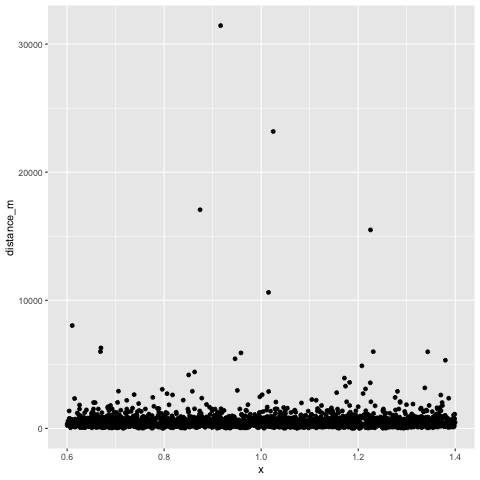

In [15]:
%%R -i df

ggplot(df, aes(y= distance_m, x=1)) +
    geom_jitter()


In [16]:
tract_shape = pd.read_csv("data/2020_Census_Tracts_-_Tabular.csv")
tract_shape = tract_shape[['the_geom','GEOID']]

In [17]:
final_df = pd.merge(merged, tract_shape, how="left", on="GEOID")
final_df.head(2)

,BoroName,COUNTYFP,GEOID,GISJOIN,LATITUDE,LONGITUDE,Latitude,Longitude,NTAName,ObjectID,POPULATION,STATEFP,SeatingTyp,TRACTCE,closest_bench,date,distance_km,distance_m,geometry,lat_long,the_geom_x,travel_time,travel_time_min,travel_time_sec,tract_name,disabled_pct,elderly_pct,the_geom_y
0,Bronx,5,36005000100,G3600050000100,40.791709,-73.884503,40.809829,-73.880207,Hunts Point,1512,3772,36,BACKED,100,"(40.8098290466, -73.8802074781)",2017-06-29,NaN,NaN,POINT (1834172.3055000007 583266.1962000001),"(40.8098290466, -73.8802074781)",POINT (-73.88020747806898 40.80982904656402),NaN,NaN,0.0,"Census Tract 1, Bronx County, New York",NaN,0.720339,MULTIPOLYGON (((-73.8728719590387 40.785975027...
1,Bronx,5,36005000200,G3600050000200,40.811740,-73.859760,40.813501,-73.858026,Soundview-Clason Point,1531,4779,36,BACKLESS,200,"(40.8135012283, -73.8580258069)",2014-12-18,0.4 km,376.0,POINT (1835669.2375000007 585926.6995000001),"(40.8135012283, -73.8580258069)",POINT (-73.85802580692271 40.81350122828774),5 mins,5.0,NaN,"Census Tract 2, Bronx County, New York",19.440775,20.915896,MULTIPOLYGON (((-73.85651604096793 40.80524122...


In [18]:
final_df.to_csv("data/pre_mapping.csv",index=False)